#LGMVIPJULY
#LetsGrowMore TASK 2
#Data Science Intern July 2022
#TASK 2 : Stock Market Prediction And Forecasting Using Stacked LSTM
#Author : Sandhya Maddela

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import  mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
data['Date']=pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


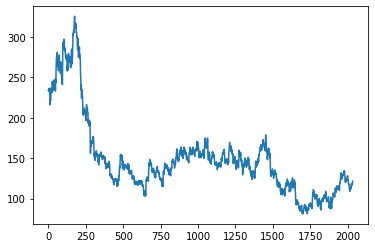

In [ ]:
plt.plot(df['Close'])

In [ ]:
dff=df['Close']
dff

2034    121.55
2033    120.90
2032    120.65
2031    117.60
2030    118.65
         ...  
4       233.30
3       236.10
2       234.25
1       233.25
0       233.75
Name: Close, Length: 2035, dtype: float64

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
dff=scaler.fit_transform(np.array(dff).reshape(-1,1))
dff

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [ ]:
training_size=int(len(dff)*0.70)
test_size=len(dff)-training_size
train_data,test_data=dff[0:training_size,:],dff[training_size:len(dff),:1]

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 11s 264ms/step - loss: 0.0088 - val_loss: 0.0017
Epoch 2/60
19/19 [==============================] - 4s 187ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 3/60
19/19 [==============================] - 4s 187ms/step - loss: 9.3604e-04 - val_loss: 0.0013
Epoch 4/60
19/19 [==============================] - 4s 188ms/step - loss: 8.5699e-04 - val_loss: 0.0012
Epoch 5/60
19/19 [==============================] - 4s 189ms/step - loss: 8.3721e-04 - val_loss: 0.0012
Epoch 6/60
19/19 [==============================] - 4s 188ms/step - loss: 8.1867e-04 - val_loss: 0.0012
Epoch 7/60
19/19 [==============================] - 4s 188ms/step - loss: 7.9790e-04 - val_loss: 0.0011
Epoch 8/60
19/19 [==============================] - 4s 186ms/step - loss: 7.8548e-04 - val_loss: 0.0011
Epoch 9/60
19/19 [==============================] - 4s 188ms/step - loss: 7.6769e-04 - val_loss: 0.0010
Epoch 10/60
19/19 [==============================] - 4s 190ms/step - lo

In [ ]:
test_predict=model.predict(X_test)

In [ ]:
test_predicted=scaler.inverse_transform(test_predict)
test_predicted


array([[141.44193 ],
       [141.54364 ],
       [140.39342 ],
       [137.31644 ],
       [135.84055 ],
       [135.71281 ],
       [137.44432 ],
       [139.20251 ],
       [139.19469 ],
       [138.36491 ],
       [137.97499 ],
       [139.52048 ],
       [140.43246 ],
       [142.2367  ],
       [144.62013 ],
       [141.63823 ],
       [138.84283 ],
       [138.9569  ],
       [140.14429 ],
       [146.40166 ],
       [150.84802 ],
       [152.06873 ],
       [151.45    ],
       [148.62305 ],
       [148.9378  ],
       [149.1959  ],
       [150.03502 ],
       [152.09302 ],
       [152.5106  ],
       [152.03413 ],
       [152.25726 ],
       [150.68419 ],
       [146.91954 ],
       [140.6919  ],
       [137.70929 ],
       [137.48642 ],
       [138.14005 ],
       [137.12418 ],
       [134.211   ],
       [129.95598 ],
       [127.52804 ],
       [126.80626 ],
       [124.87274 ],
       [124.39504 ],
       [122.2891  ],
       [119.53301 ],
       [119.16663 ],
       [119.1

In [ ]:
performance = math.sqrt(mean_squared_error(ytest,test_predict))
performance

0.04209476083273302